In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font',family = 'malgun gothic')

In [4]:
train = pd.read_csv('C:/Users/whileduck/Desktop/open/train.csv')
test = pd.read_csv('C:/Users/whileduck/Desktop/open/test.csv')

In [5]:
df = train.copy()

In [6]:
df.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


# 익숙한 단위로 바꿔주자 

In [7]:
def f_to_c(x):
    '''
    화씨 온도를 섭씨온도로 바꿔주는 코드
    '''
    
    return (x-32) * (5/9)

def feet_to_cm(x):
    '''
    feet 를 cm 로 변환 해주는 코드
    '''
    
    return x * 30.48

def inch_to_cm(x):
    '''
    inch 를 cm 으로 변환 해주는 코드
    '''
    return x * 2.54

def pound_to_kg(x):
    return x * 0.45

In [8]:
def preprocessing(dataframe):
    
    dataframe['Temperature'] = round(dataframe['Body_Temperature(F)'].map(f_to_c),1)
    
    dataframe['Height(Feet)'] = dataframe['Height(Feet)'].map(feet_to_cm)
    dataframe['Height(Remainder_Inches)'] = dataframe['Height(Remainder_Inches)'].map(inch_to_cm)
    
    dataframe['CM'] = round(dataframe['Height(Feet)'] + dataframe['Height(Remainder_Inches)'],1)
    
    dataframe['Weight'] = round(dataframe['Weight(lb)'].map(pound_to_kg),1)
    
    dataframe = dataframe[['Exercise_Duration','Temperature','BPM','CM','Weight',
                            'Weight_Status','Gender','Age','Calories_Burned']]
    
    return dataframe

In [9]:
df = preprocessing(df)

df.head()

,Exercise_Duration,Temperature,BPM,CM,Weight,Weight_Status,Gender,Age,Calories_Burned
0,26.0,40.9,107.0,175.3,69.4,Normal Weight,F,45,166.0
1,7.0,39.6,88.0,198.1,101.2,Overweight,M,50,33.0
2,7.0,39.6,86.0,190.5,98.2,Overweight,M,29,23.0
3,17.0,40.0,99.0,167.6,66.5,Normal Weight,F,33,91.0
4,9.0,39.3,88.0,177.8,76.4,Normal Weight,M,38,32.0


# 간단한 시각화 

In [10]:
num_cols = df.describe().columns.tolist()
obj_cols = list(set(df.columns)- set(num_cols))

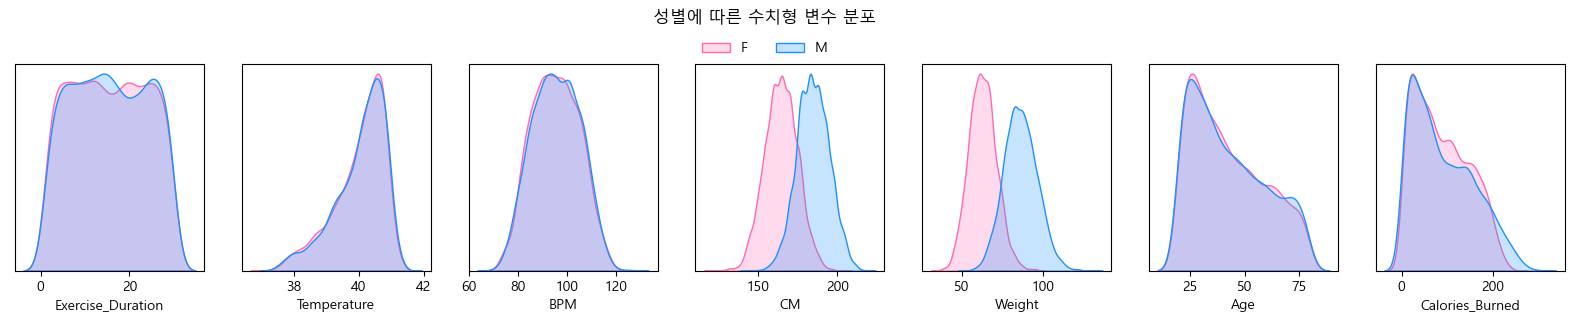

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 3))

ax = ax.flatten()

gender = ['F','M']
colors = ['#ff69b4','#1e90ff']

for num,g in enumerate(gender):
    for i, var in enumerate(num_cols):

        sns.kdeplot(data=df[df['Gender'] == g],
                    x=var,
                    fill=True,
                    color = colors[num],
                    label = g,
                    ax=ax[i])
        
        ax[i].set_yticks([])
        ax[i].set_ylabel('')

# subplot 밖에 legend 추가
fig.legend(
    handles=ax[0].get_legend_handles_labels()[0],
    labels=ax[0].get_legend_handles_labels()[1],
    loc='center', 
    bbox_to_anchor = (0.5,0.85),# legend 위치
    ncol=2,  # legend를 2개 열로 배치
    fontsize='medium',  # legend font size
    frameon=False  # legend 테두리 제거
)

plt.subplots_adjust(top=0.8)  # subplot과 legend의 간격 조절
fig.suptitle('성별에 따른 수치형 변수 분포')  # subplot 위에 추가적인 title
plt.show()

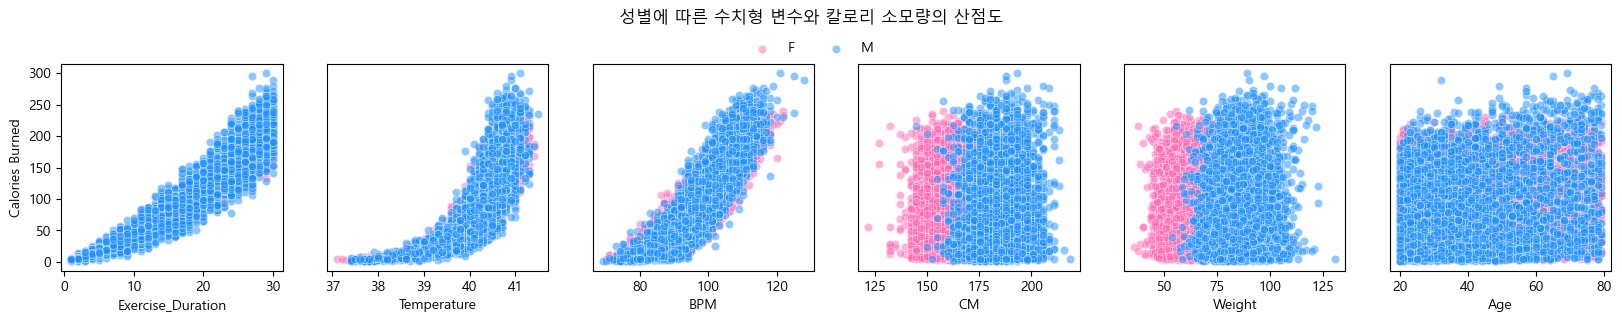

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 3))

ax = ax.flatten()

gender = ['F','M']
colors = ['#ff69b4','#1e90ff']


for num,g in enumerate(gender):
    for i, var in enumerate(num_cols[:-1]):

        sns.scatterplot(data=df[df['Gender'] == g],
                    x=var,
                    y = 'Calories_Burned',
                    alpha = 0.5,
                    legend = False,
                    color = colors[num],
                    label = g,
                    ax=ax[i])
        if i != 0:
            ax[i].set_ylabel('')
            ax[i].set_yticks([])
            
        else:
            ax[i].set_ylabel('Calories Burned')
            
            
    

# subplot 밖에 legend 추가
fig.legend(
    handles=ax[0].get_legend_handles_labels()[0],
    labels=ax[0].get_legend_handles_labels()[1],
    loc='center', 
    bbox_to_anchor = (0.5,0.85),# legend 위치
    ncol=2,  # legend를 2개 열로 배치
    fontsize='medium',  # legend font size
    frameon=False  # legend 테두리 제거
)

plt.subplots_adjust(top=0.8)  # subplot과 legend의 간격 조절
fig.suptitle('성별에 따른 수치형 변수와 칼로리 소모량의 산점도')  # subplot 위에 추가적인 title
plt.show()

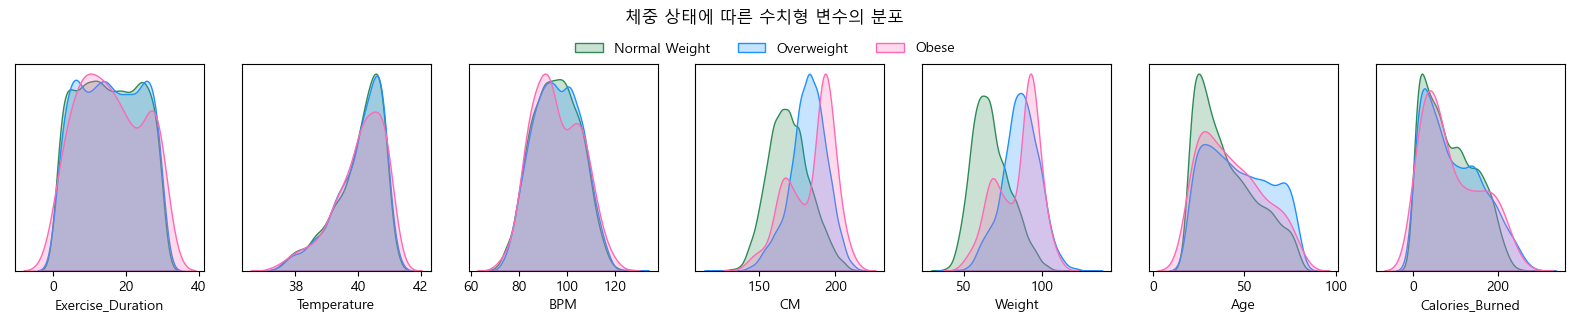

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 3))

ax = ax.flatten()

gender = ['Normal Weight', 'Overweight', 'Obese']
colors = ['#2e8b57', '#1e90ff', '#ff69b4']

for num,g in enumerate(gender):
    for i, var in enumerate(num_cols):

        sns.kdeplot(data=df[df['Weight_Status'] == g],
                    x=var,
                    fill=True,
                    color = colors[num],
                    label = g,
                    ax=ax[i])
        
        ax[i].set_yticks([])
        ax[i].set_ylabel('')

# subplot 밖에 legend 추가
fig.legend(
    handles=ax[0].get_legend_handles_labels()[0],
    labels=ax[0].get_legend_handles_labels()[1],
    loc='center', 
    bbox_to_anchor = (0.5,0.85),# legend 위치
    ncol = 3,  # legend를 2개 열로 배치
    fontsize = 'medium',  # legend font size
    frameon = False  # legend 테두리 제거
)

plt.subplots_adjust(top=0.8)  # subplot과 legend의 간격 조절
fig.suptitle('체중 상태에 따른 수치형 변수의 분포')  # subplot 위에 추가적인 title
plt.show()

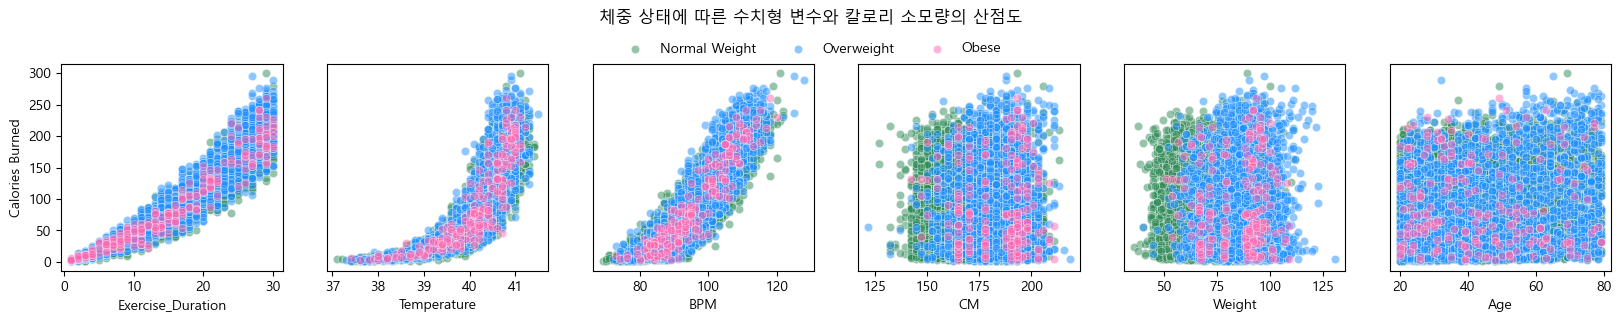

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 3))

ax = ax.flatten()

gender = ['Normal Weight', 'Overweight', 'Obese']
colors = ['#2e8b57', '#1e90ff', '#ff69b4']

for num,g in enumerate(gender):
    for i, var in enumerate(num_cols[:-1]):

        sns.scatterplot(data=df[df['Weight_Status'] == g],
                    x=var,
                    y = 'Calories_Burned',
                    legend = False,
                    color = colors[num],
                    alpha = 0.5,
                    label = g,
                    ax=ax[i])
        if i != 0:
            ax[i].set_ylabel('')
            ax[i].set_yticks([])
            
        else:
            ax[i].set_ylabel('Calories Burned')
            
            
    

# subplot 밖에 legend 추가
fig.legend(
    handles=ax[0].get_legend_handles_labels()[0],
    labels=ax[0].get_legend_handles_labels()[1],
    loc='center', 
    bbox_to_anchor = (0.5,0.85),# legend 위치
    ncol= 3,  # legend를 2개 열로 배치
    fontsize='medium',  # legend font size
    frameon=False  # legend 테두리 제거
)

plt.subplots_adjust(top=0.8)  # subplot과 legend의 간격 조절
fig.suptitle('체중 상태에 따른 수치형 변수와 칼로리 소모량의 산점도')  # subplot 위에 추가적인 title
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)

X = df.drop('Calories_Burned',axis = 1 )
Y = df['Calories_Burned']

x_train_full, x_test, y_train_full, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [16]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full, y_train_full, test_size = 0.2,
                                                    random_state = 42)

# 기본적인 신경망 만들기 

In [17]:
from tensorflow import keras as tf

In [18]:
class LossMSECallback(tf.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 30 == 0:
            print(f"Epoch {epoch}, train_Loss: {logs['loss']:.4f}, train_RMSE: {logs['root_mean_squared_error']:.4f}")
            print(f"Epoch {epoch}, valid_Loss: {logs['val_loss']:.4f}, valid_RMSE: {logs['val_root_mean_squared_error']:.4f}")
            print('**'*30)
            

In [19]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.metrics import RootMeanSquaredError

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [22]:
weights = model.get_weights()
for i in range(len(weights)):
    weights[i] = np.random.rand(*weights[i].shape)
model.set_weights(weights)

In [23]:
history = model.fit(x_train,y_train,
                    epochs = 301,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])

Epoch 0, train_Loss: 160714571776.0000, train_RMSE: 400892.2188
Epoch 0, valid_Loss: 70452084736.0000, valid_RMSE: 265428.1250
************************************************************
Epoch 30, train_Loss: 46805.5859, train_RMSE: 216.3460
Epoch 30, valid_Loss: 47301.7852, valid_RMSE: 217.4897
************************************************************
Epoch 60, train_Loss: 13520.9883, train_RMSE: 116.2798
Epoch 60, valid_Loss: 13097.6299, valid_RMSE: 114.4449
************************************************************
Epoch 90, train_Loss: 864.0682, train_RMSE: 29.3950
Epoch 90, valid_Loss: 933.6209, valid_RMSE: 30.5552
************************************************************
Epoch 120, train_Loss: 444.0207, train_RMSE: 21.0718
Epoch 120, valid_Loss: 378.9277, valid_RMSE: 19.4661
************************************************************
Epoch 150, train_Loss: 567.3105, train_RMSE: 23.8183
Epoch 150, valid_Loss: 196.3947, valid_RMSE: 14.0141
********************************

In [24]:
result = pd.DataFrame(history.history)

models_diction = {'original':model}
history_diction = {'original':result} #추후 비교를 위해 담아주자 

# 배치 정규화 모델링 

 * 배치 정규화는 DNN에서 과적합(overfitting)을 방지하고 학습을 안정화시키는 기법 중 하나입니다. 이를 통해 네트워크의 가중치 초기값에 민감하지 않도록 하고, gradient vanishing/exploding 문제를 완화시켜 학습을 빠르고 안정적으로 수행할 수 있습니다.

 * 배치 정규화는 네트워크의 은닉층에 배치 단위로 정규화(normalization)를 적용하여 학습 시 입력 분포를 정규화합니다. 이를 통해 학습 시 입력값의 분포가 변화하더라도 네트워크 내부의 가중치 값이 안정적으로 변화하도록 합니다. 배치 정규화는 다음과 같은 방법으로 수행됩니다.

1. 미니배치(minibatch)를 입력으로 받아 각각의 feature의 평균과 분산을 구합니다.
2. 평균과 분산을 이용해 각 feature를 정규화합니다.
3. 정규화된 feature에 scale과 shift를 수행하여 새로운 feature를 생성합니다. scale과 shift는 각각 학습되는 가중치입니다.
4. 이렇게 생성된 feature를 다음 레이어로 전달합니다.
5. 배치 정규화는 모델의 성능을 향상시키는 효과가 매우 크기 때문에 DNN 모델에서 자주 사용되는 기법 중 하나입니다.

In [25]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [26]:
weights = model.get_weights()
for i in range(len(weights)):
    weights[i] = np.random.rand(*weights[i].shape)
model.set_weights(weights)

In [27]:
weights = model.get_weights()

for i in range(len(weights)):
    weights[i] = np.random.rand(*weights[i].shape) # 초기 가중치 랜덤화 

model.set_weights(weights)

In [28]:
history = model.fit(x_train,y_train,
                    epochs = 301,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])

result = pd.DataFrame(history.history)

Epoch 0, train_Loss: 25431954.0000, train_RMSE: 5043.0103
Epoch 0, valid_Loss: 102080040.0000, valid_RMSE: 10103.4668
************************************************************
Epoch 30, train_Loss: 588.9832, train_RMSE: 24.2690
Epoch 30, valid_Loss: 470.6479, valid_RMSE: 21.6944
************************************************************
Epoch 60, train_Loss: 280.7527, train_RMSE: 16.7557
Epoch 60, valid_Loss: 107.0814, valid_RMSE: 10.3480
************************************************************
Epoch 90, train_Loss: 187.7893, train_RMSE: 13.7036
Epoch 90, valid_Loss: 48.4244, valid_RMSE: 6.9588
************************************************************
Epoch 120, train_Loss: 177.3371, train_RMSE: 13.3168
Epoch 120, valid_Loss: 11.1455, valid_RMSE: 3.3385
************************************************************
Epoch 150, train_Loss: 189.6833, train_RMSE: 13.7726
Epoch 150, valid_Loss: 30.9806, valid_RMSE: 5.5660
***********************************************************

In [29]:
models_diction['batch_normalization'] = model
history_diction['batch_normailzation'] = result

# Dropout 추가하기

* Dropout은 딥러닝에서 regularization(규제)의 한 종류로, 특히 overfitting(과적합) 문제를 해결하는 방법 중 하나입니다.

* Dropout은 학습 과정에서 무작위로 일부 뉴런을 선택하고, 그 뉴런의 출력을 0으로 만듭니다. 이 때, 뉴런이 선택되지 않는 확률은 dropout rate(드롭아웃 비율)로 정해집니다. 즉, dropout rate가 0.2이면, 학습 과정에서 무작위로 20%의 뉴런이 선택되지 않습니다. 이러한 무작위한 뉴런 선택은 모델의 복잡도를 줄이고, 모델이 특정 뉴런에 과도하게 의존하지 않도록 합니다.

* Dropout을 적용하면 모델이 일반화(새로운 데이터에 대한 예측 능력) 능력이 향상되는 경향이 있습니다. 이는 학습 데이터에만 지나치게 적응하지 않고, 다른 데이터에서도 유효한 패턴을 학습하기 때문입니다. 하지만, Dropout을 적용하면 학습 속도가 느려지고, 학습을 마치는 데 필요한 epoch 수가 증가할 수 있습니다.

In [30]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dropout(0.2)) #dropout 
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [31]:
weights =  model.get_weights()

for i in range(len(weights)):
    
    weights[i] = np.random.randn(*weights[i].shape)
    
model.set_weights(weights)

In [32]:
history = model.fit(x_train,y_train,
                    epochs = 301,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])

result = pd.DataFrame(history.history)

models_diction['dropout_normalization'] = model
history_diction['dropout_normailzation'] = result

Epoch 0, train_Loss: 51036.3281, train_RMSE: 225.9122
Epoch 0, valid_Loss: nan, valid_RMSE: nan
************************************************************
Epoch 30, train_Loss: 342.6218, train_RMSE: 18.5100
Epoch 30, valid_Loss: 453.7470, valid_RMSE: 21.3013
************************************************************
Epoch 60, train_Loss: 213.7698, train_RMSE: 14.6209
Epoch 60, valid_Loss: 315.8834, valid_RMSE: 17.7731
************************************************************
Epoch 90, train_Loss: 216.5853, train_RMSE: 14.7168
Epoch 90, valid_Loss: 362.5080, valid_RMSE: 19.0396
************************************************************
Epoch 120, train_Loss: 204.7340, train_RMSE: 14.3085
Epoch 120, valid_Loss: 307.5421, valid_RMSE: 17.5369
************************************************************
Epoch 150, train_Loss: 174.4880, train_RMSE: 13.2094
Epoch 150, valid_Loss: 356.1237, valid_RMSE: 18.8712
************************************************************
Epoch 180, tra

# layer 별 node 의 갯수를 증가시켜보기 

* DNN에서 node의 갯수를 증가시키는 것은 모델의 용량(capacity)을 증가시키는 것입니다. 즉, 모델이 학습할 수 있는 함수의 복잡성이 증가하므로 더 복잡한 패턴을 학습할 수 있게 됩니다. 이는 모델의 성능을 향상시킬 수 있습니다.

* 하지만 node의 갯수를 증가시키는 것은 일반적으로 모델의 복잡성이 증가하므로 overfitting의 위험이 있습니다. 또한 node의 갯수가 많으면 학습이 느려지고 메모리 사용량도 증가합니다. 또한 node의 갯수가 증가하면 모델이 복잡해지므로, 데이터의 양이 적을 경우에는 overfitting의 위험이 더욱 커집니다.

* 따라서 node의 갯수를 증가시키는 것은 모델의 성능을 높일 수 있는 방법 중 하나이지만, 적절한 값을 찾아야 하며, 데이터의 양과 모델의 복잡성을 적절하게 고려해야 합니다.

In [33]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(500, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(500, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [34]:
weights =  model.get_weights()

for i in range(len(weights)):
    
    weights[i] = np.random.randn(*weights[i].shape)
    
model.set_weights(weights)

history = model.fit(x_train,y_train,
                    epochs = 301,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])


result = pd.DataFrame(history.history)

models_diction['more_node_normalization'] = model
history_diction['more_node_normailzation'] = result

Epoch 0, train_Loss: 59405.6484, train_RMSE: 243.7327
Epoch 0, valid_Loss: nan, valid_RMSE: nan
************************************************************
Epoch 30, train_Loss: 798.0741, train_RMSE: 28.2502
Epoch 30, valid_Loss: 482.0988, valid_RMSE: 21.9567
************************************************************
Epoch 60, train_Loss: 536.6326, train_RMSE: 23.1653
Epoch 60, valid_Loss: 2196.0483, valid_RMSE: 46.8620
************************************************************
Epoch 90, train_Loss: 451.9539, train_RMSE: 21.2592
Epoch 90, valid_Loss: 21.1536, valid_RMSE: 4.5993
************************************************************
Epoch 120, train_Loss: 380.6354, train_RMSE: 19.5099
Epoch 120, valid_Loss: 285.1559, valid_RMSE: 16.8866
************************************************************
Epoch 150, train_Loss: 304.2922, train_RMSE: 17.4440
Epoch 150, valid_Loss: 78.3745, valid_RMSE: 8.8529
************************************************************
Epoch 180, train_

# Node 수는 놔두고 Layer 수를 증가시키기 

* DNN에서 layer의 수를 증가시키는 것은 모델의 복잡도를 증가시키는 것을 의미합니다. 즉, 입력층과 출력층 사이에 추가적인 은닉층을 생성하는 것입니다.

* 이것의 장점은 더 복잡한 문제에 대해서 더 높은 성능을 제공할 수 있다는 것입니다. 또한, 더 많은 layer를 추가함으로써 모델이 데이터를 더 잘 이해하고 더 일반화 할 수 있게 됩니다.

* 하지만 layer의 수를 증가시키면서 생기는 문제점도 있습니다. 모델이 복잡해짐에 따라 과적합(overfitting) 가능성이 커집니다. 이를 해결하기 위해서는 regularization 기법(예: dropout, L1, L2 정규화 등)을 사용하거나, layer의 수를 줄이는 등의 방법으로 모델의 복잡도를 제어해야 합니다. 또한, layer의 수가 많아지면 학습에 필요한 시간이 증가할 수 있습니다.

In [35]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층

model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [36]:
weights =  model.get_weights()

for i in range(len(weights)):
    
    weights[i] = np.random.randn(*weights[i].shape)
    
model.set_weights(weights)

history = model.fit(x_train,y_train,
                    epochs = 301,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])


result = pd.DataFrame(history.history)

models_diction['more_layer_normalization'] = model
history_diction['more_layer_normailzation'] = result

Epoch 0, train_Loss: 38798028722667520.0000, train_RMSE: 196972160.0000
Epoch 0, valid_Loss: nan, valid_RMSE: nan
************************************************************
Epoch 30, train_Loss: 111699961053184.0000, train_RMSE: 10568820.0000
Epoch 30, valid_Loss: 91148190220288.0000, valid_RMSE: 9547156.0000
************************************************************
Epoch 60, train_Loss: 17742853832704.0000, train_RMSE: 4212226.5000
Epoch 60, valid_Loss: 10540078333952.0000, valid_RMSE: 3246548.7500
************************************************************
Epoch 90, train_Loss: 2278828802048.0000, train_RMSE: 1509579.0000
Epoch 90, valid_Loss: 4280534433792.0000, valid_RMSE: 2068945.2500
************************************************************
Epoch 120, train_Loss: 463422095360.0000, train_RMSE: 680751.1250
Epoch 120, valid_Loss: 190318903296.0000, valid_RMSE: 436255.5625
************************************************************
Epoch 150, train_Loss: 59799072768.0000, 

### Gradient 폭주 발생

* 딥러닝 모델에서 각 레이어의 가중치는 역전파 알고리즘을 통해 최적화됩니다. 이때, 기울기 값이 매우 큰 경우 가중치 갱신이 불안정해지고, 모델의 성능이 저하될 수 있습니다. 예를 들어, exp 함수처럼 무한대로 발산하는 함수가 있다면 해당 함수를 활성화 함수로 사용하면 Gradient 폭주 현상이 발생할 가능성이 높아집니다.

* Gradient 폭주를 방지하기 위해 일반적으로 가중치 초기화, 학습률 조절, 그래디언트 클리핑 등의 방법이 사용됩니다. 가중치 초기화 방법으로는 Xavier 초기화나 He 초기화 등이 있으며, 학습률 조절 방법으로는 학습률 스케줄링이나 적응적 학습률을 사용할 수 있습니다. 또한, 그래디언트 클리핑은 일정 값 이상의 기울기를 잘라내는 방법으로, 일부 최적화 알고리즘에서 기본적으로 제공되기도 합니다.

# Layer 의 수는 늘리지만 node 의 갯수는 1/10으로 줄여보자 

In [37]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층

model.add(tf.layers.Dropout(0.1)) #dropout 
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(10, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [38]:
weights =  model.get_weights()

for i in range(len(weights)):
    
    weights[i] = np.random.randn(*weights[i].shape)
    
model.set_weights(weights)

history = model.fit(x_train,y_train,
                    epochs = 301,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])


result = pd.DataFrame(history.history)

models_diction['more_layer_10_normalization'] = model
history_diction['more_layer_10_normailzation'] = result

Epoch 0, train_Loss: 1400083.0000, train_RMSE: 1183.2510
Epoch 0, valid_Loss: nan, valid_RMSE: nan
************************************************************
Epoch 30, train_Loss: 2070.9570, train_RMSE: 45.5078
Epoch 30, valid_Loss: 1543.7444, valid_RMSE: 39.2905
************************************************************
Epoch 60, train_Loss: 597.6769, train_RMSE: 24.4474
Epoch 60, valid_Loss: 516.6989, valid_RMSE: 22.7310
************************************************************
Epoch 90, train_Loss: 303.9067, train_RMSE: 17.4329
Epoch 90, valid_Loss: 199.2943, valid_RMSE: 14.1172
************************************************************
Epoch 120, train_Loss: 307.2769, train_RMSE: 17.5293
Epoch 120, valid_Loss: 89.4602, valid_RMSE: 9.4583
************************************************************
Epoch 150, train_Loss: 210.2967, train_RMSE: 14.5016
Epoch 150, valid_Loss: 126.7471, valid_RMSE: 11.2582
************************************************************
Epoch 180, 

# Model 평가 

In [39]:
print('Test set 에 대한 모델 별 평가 점수')

for name,model in models_diction.items():
    
    result = model.evaluate(x_test,y_test,
                    verbose = 0)
    
    loss = round(result[0],2)
    rmse = round(result[1],2)
    
    print('*' * 20)
    print(name,'model')
    print('RMSE:',rmse)
    print('Loss:',loss)

Test set 에 대한 모델 별 평가 점수
********************
original model
RMSE: 7.45
Loss: 55.46
********************
batch_normalization model
RMSE: 5.71
Loss: 32.63
********************
dropout_normalization model
RMSE: 18.76
Loss: 351.77
********************
more_node_normalization model
RMSE: 4.62
Loss: 21.34
********************
more_layer_normalization model
RMSE: 21520.87
Loss: 463147680.0
********************
more_layer_10_normalization model
RMSE: 7.59
Loss: 57.58


Text(0.5, 0.98, 'epochs 수에 따른 train , validation set 의 Loss 값 변화')

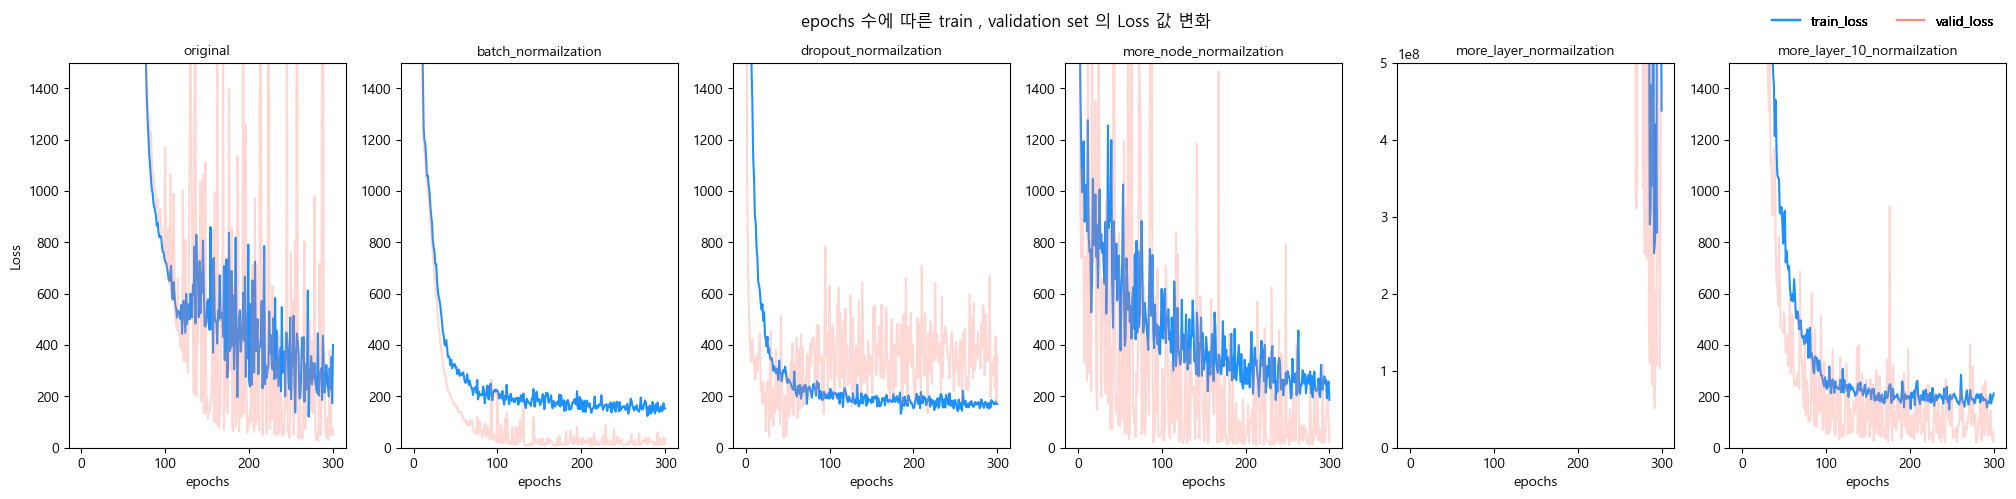

In [40]:
fig,ax = plt.subplots(ncols = 6,
                        nrows = 1,
                        figsize = (25,5))

ax = ax.flatten()

i = 0
for name,model in history_diction.items():
    
    ax[i].plot(range(len(model)),
                model['loss'],
                c = 'dodgerblue',
                label = 'train_loss')
    
    
    ax[i].plot(range(len(model)),
                model['val_loss'],
                alpha = 0.3,
                c = 'salmon',
                label = 'valid_loss')
    
    ax[i].set_title(name,
                    fontsize = 10)
    ax[i].ticklabel_format(style = 'plain')
    ax[i].set_ylim([0,1500])
    ax[i].set_xlabel('epochs')
    i += 1
    
    ax[0].set_ylabel('Loss')
    ax[4].set_ylim([0,500000000])
    ax[4].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    fig.legend(['train_loss','valid_loss'],
                loc = 'upper right',
                bbox_to_anchor = (0.9,1),
                ncol = 2,
                frameon = False)
    
fig.suptitle('epochs 수에 따른 train , validation set 의 Loss 값 변화')

* 정규화를 시켜주지 않은 original 모델의 경우는 scale이 커서 학습과정이 불안정한 모습이 보인다.
* node 의 갯수를 늘리거나, layer 의 갯수를 늘린 경우엔 이전과 동일한 epochs 로 시행하게 되면 학습이 마무리 되지 않은 듯한 모습을 보인다.
* node 와 layer 의 갯수 두 개를 모두 늘린 경우엔 기울기 폭주로 인해 해당 모델이 최적의 가중치를 찾지 못 하고 있는 모습을 볼 수 있다.

Text(0.5, 0.98, 'epochs 수에 따른 trian, validation set 의 RMSE 변화')

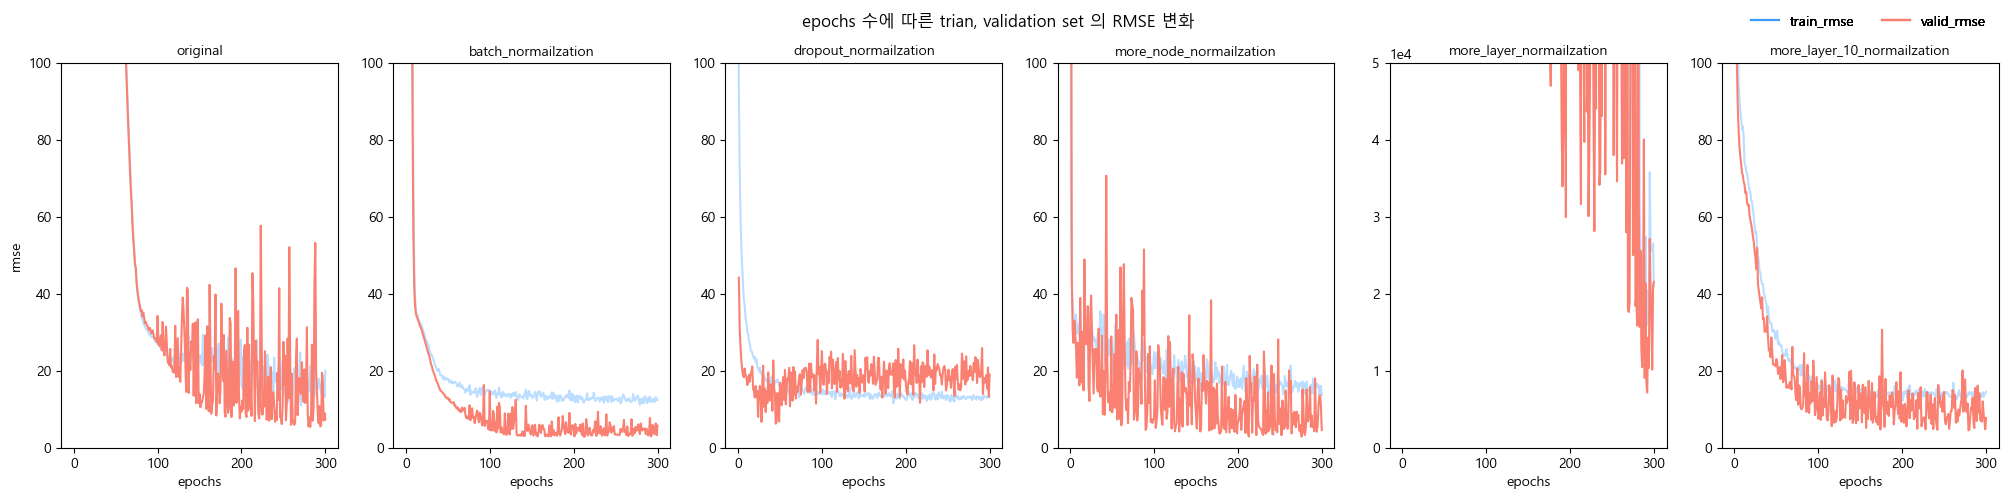

In [41]:
fig,ax = plt.subplots(ncols = 6,
                        nrows = 1,
                        figsize = (25,5))

ax = ax.flatten()

i = 0
for name,model in history_diction.items():
    
    ax[i].plot(range(len(model)),
                model['root_mean_squared_error'],
                c = 'dodgerblue',
                alpha = 0.3,
                label = 'train_rmse')
    
    
    ax[i].plot(range(len(model)),
                model['val_root_mean_squared_error'],
                c = 'salmon',
                label = 'valid_rmse')
    
    ax[i].set_title(name,
                    fontsize = 10)
    ax[i].ticklabel_format(style = 'plain')
    ax[i].set_ylim([0,100])
    ax[i].set_xlabel('epochs')
    i += 1
    
    ax[0].set_ylabel('rmse')
    ax[4].set_ylim([0,50000])
    ax[4].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    fig.legend(['train_rmse','valid_rmse'],
                loc = 'upper right',
                bbox_to_anchor = (0.9,1),
                ncol = 2,
                frameon = False)
    
    
fig.suptitle('epochs 수에 따른 trian, validation set 의 RMSE 변화')

* batch normalization 을 시행한 모델의 성능이 가장 좋았던 것으로 보인다. 
* 다양한 정규화 기법을 시행해보자 

# 규제 

* 규제를 넣어주니 학습하는데 epochs 가 부족한 모습을 보였다.
* 규제 사항에는 epochs 를 늘려서 학습해보자 

### L1 규제

In [42]:
from tensorflow.keras import regularizers

model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(100, activation = 'relu',
                            kernel_regularizer=regularizers.l1(0.5))) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [43]:
weights =  model.get_weights()

for i in range(len(weights)):
    
    weights[i] = np.random.randn(*weights[i].shape)
    
model.set_weights(weights)

history = model.fit(x_train,y_train,
                    epochs = 421,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])


result = pd.DataFrame(history.history)

models_diction['batch_l1_normalization'] = model
history_diction['batch_l1_normailzation'] = result

Epoch 0, train_Loss: 12671.1885, train_RMSE: 110.6339
Epoch 0, valid_Loss: nan, valid_RMSE: nan
************************************************************
Epoch 30, train_Loss: 629.7229, train_RMSE: 15.4722
Epoch 30, valid_Loss: 437.2194, valid_RMSE: 6.9133
************************************************************
Epoch 60, train_Loss: 534.6021, train_RMSE: 14.0280
Epoch 60, valid_Loss: 372.4442, valid_RMSE: 5.9665
************************************************************
Epoch 90, train_Loss: 503.9170, train_RMSE: 14.7327
Epoch 90, valid_Loss: 352.8343, valid_RMSE: 8.1754
************************************************************
Epoch 120, train_Loss: 396.0020, train_RMSE: 12.4533
Epoch 120, valid_Loss: 274.9915, valid_RMSE: 5.9027
************************************************************
Epoch 150, train_Loss: 371.5992, train_RMSE: 13.0985
Epoch 150, valid_Loss: 256.6026, valid_RMSE: 7.5646
************************************************************
Epoch 180, train_Lo

In [44]:
from tensorflow.keras import regularizers

model = tf.models.Sequential()

model.add(tf.layers.Flatten(input_shape = [x_train.shape[1],])) #입력층 생성
model.add(tf.layers.BatchNormalization(input_shape = [x_train.shape[1],])) # 배치 정규화 추가 
model.add(tf.layers.Dense(100, activation = 'relu',
                            kernel_regularizer=regularizers.l2(0.5))) #은닉층
model.add(tf.layers.Dense(100, activation = 'relu')) #은닉층
model.add(tf.layers.Dense(1)) #출력층

params = {'loss' : 'mean_squared_error',
          'optimizer': 'adam',
          'metrics':[RootMeanSquaredError()]}

model.compile(**params)

In [45]:
weights =  model.get_weights()

for i in range(len(weights)):
    
    weights[i] = np.random.randn(*weights[i].shape)
    
model.set_weights(weights)

history = model.fit(x_train,y_train,
                    epochs = 421,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[LossMSECallback()])


result = pd.DataFrame(history.history)

models_diction['batch_l2_normalization'] = model
history_diction['batch_l2_normailzation'] = result

Epoch 0, train_Loss: 6321.9824, train_RMSE: 76.1683
Epoch 0, valid_Loss: nan, valid_RMSE: nan
************************************************************
Epoch 30, train_Loss: 597.7354, train_RMSE: 14.7045
Epoch 30, valid_Loss: 458.1590, valid_RMSE: 8.8598
************************************************************
Epoch 60, train_Loss: 500.8523, train_RMSE: 14.2747
Epoch 60, valid_Loss: 335.1281, valid_RMSE: 6.2591
************************************************************
Epoch 90, train_Loss: 419.9004, train_RMSE: 13.5047
Epoch 90, valid_Loss: 305.8040, valid_RMSE: 8.3181
************************************************************
Epoch 120, train_Loss: 363.8917, train_RMSE: 13.2835
Epoch 120, valid_Loss: 229.0258, valid_RMSE: 6.5075
************************************************************
Epoch 150, train_Loss: 323.1518, train_RMSE: 13.2835
Epoch 150, valid_Loss: 171.3935, valid_RMSE: 5.0356
************************************************************
Epoch 180, train_Loss

In [46]:
print('Test set 에 대한 모델 별 평가 점수')

bathcs = ['batch_normalization', 'batch_l1_normalization', 'batch_l2_normalization']

for i,var in enumerate(bathcs):
    
    model = models_diction[var]
    
    result = model.evaluate(x_test,y_test,
                    verbose = 0)
    
    loss = round(result[0],2)
    rmse = round(result[1],2)
    
    print('*' * 20)
    print(var,'model')
    print('RMSE:',rmse)
    print('Loss:',loss)

Test set 에 대한 모델 별 평가 점수
********************
batch_normalization model
RMSE: 5.71
Loss: 32.63
********************
batch_l1_normalization model
RMSE: 4.44
Loss: 65.93
********************
batch_l2_normalization model
RMSE: 4.75
Loss: 52.08


Text(0.5, 0.98, '규제 값에 따른 train, validation set 의 Loss 값 변화')

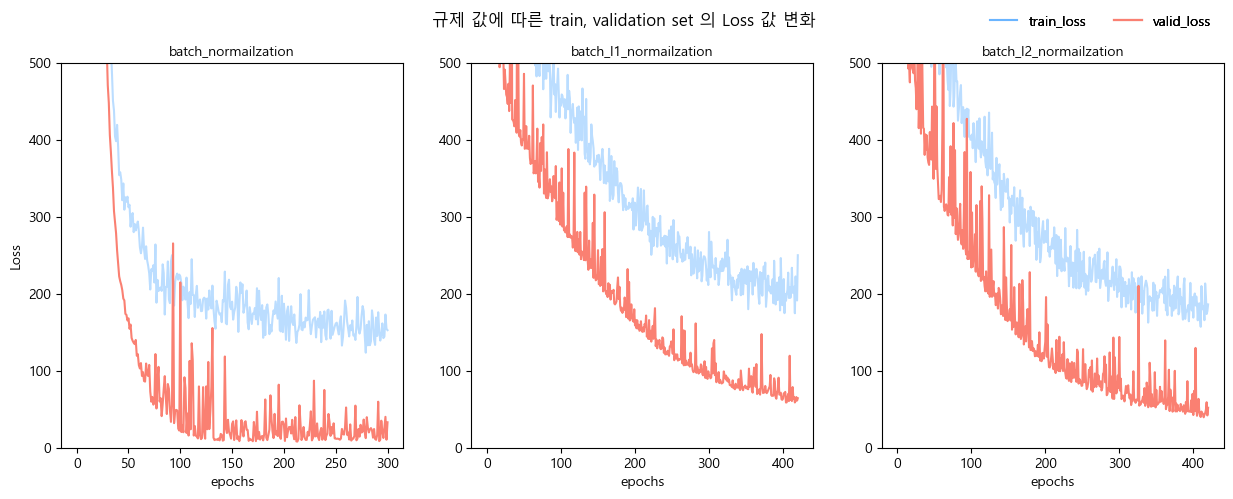

In [47]:
bathcs = ['batch_normailzation','batch_l1_normailzation', 'batch_l2_normailzation']

fig,ax = plt.subplots(ncols = 3,
                        figsize = (15,5))
ax = ax.flatten()

for i,var in enumerate(bathcs):
    
    batch_df = history_diction[var]
    
    ax[i].plot(range(len(batch_df)),
                batch_df['loss'],
                c = 'dodgerblue',
                alpha = 0.3,
                label = 'train_rmse')
    
    
    ax[i].plot(range(len(batch_df)),
                batch_df['val_loss'],
                c = 'salmon',
                label = 'valid_rmse')
    
    ax[i].set_title(var,
                    fontsize = 10)
    ax[i].ticklabel_format(style = 'plain')
    ax[i].set_ylim([0,500])
    ax[i].set_xlabel('epochs')
    
    
    ax[0].set_ylabel('Loss')
    
    fig.legend(['train_loss','valid_loss'],
                loc = 'upper right',
                bbox_to_anchor = (0.9,1),
                ncol = 2,
                frameon = False)
    
    print()
    
fig.suptitle('규제 값에 따른 train, validation set 의 Loss 값 변화')
    
    
    

Text(0.5, 0.98, '규제 값에 따른 train, validation set 의 RMSE 값 변화')

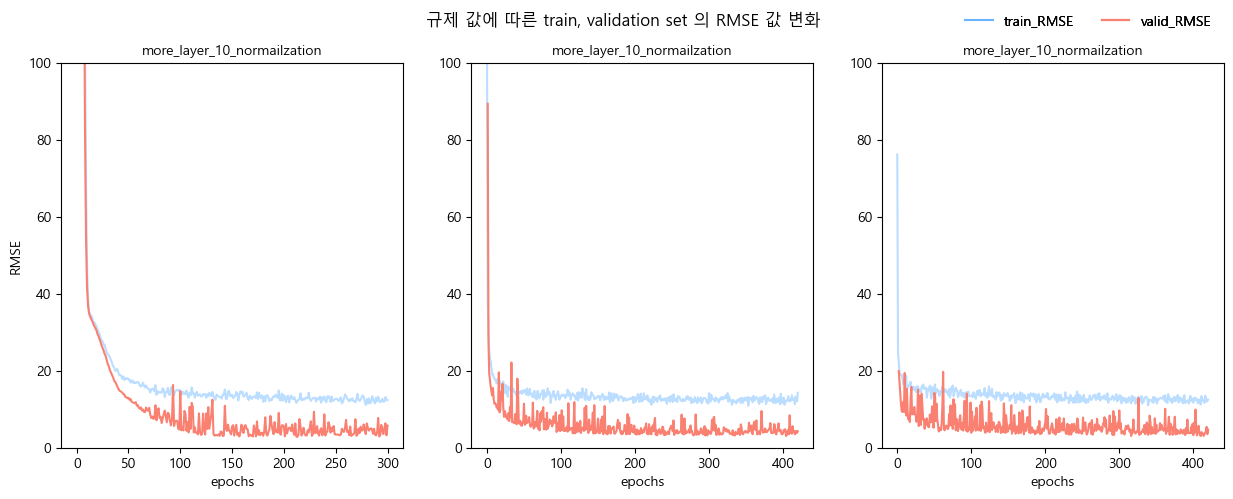

In [48]:
bathcs = ['batch_normailzation','batch_l1_normailzation', 'batch_l2_normailzation']

fig,ax = plt.subplots(ncols = 3,
                        figsize = (15,5))
ax = ax.flatten()

for i,var in enumerate(bathcs):
    
    batch_df = history_diction[var]
    
    ax[i].plot(range(len(batch_df)),
                batch_df['root_mean_squared_error'],
                c = 'dodgerblue',
                alpha = 0.3,
                label = 'train_rmse')
    
    
    ax[i].plot(range(len(batch_df)),
                batch_df['val_root_mean_squared_error'],
                c = 'salmon',
                label = 'valid_rmse')
    
    ax[i].set_title(name,
                    fontsize = 10)
    ax[i].ticklabel_format(style = 'plain')
    ax[i].set_ylim([0,100])
    ax[i].set_xlabel('epochs')
    
    
    ax[0].set_ylabel('RMSE')
    
    fig.legend(['train_RMSE','valid_RMSE'],
                loc = 'upper right',
                bbox_to_anchor = (0.9,1),
                ncol = 2,
                frameon = False)
    
    print()
    
    
fig.suptitle('규제 값에 따른 train, validation set 의 RMSE 값 변화')
    
    
    

# 최종 결론

In [49]:
for name,model in models_diction.items():
    
    RMSE = round(model.evaluate(x_test,y_test,
                            verbose = 0)[1],1)
    
    print('**'* 20)
    print(name)
    print('RMSE :',RMSE)

****************************************
original
RMSE : 7.4
****************************************
batch_normalization
RMSE : 5.7
****************************************
dropout_normalization
RMSE : 18.8
****************************************
more_node_normalization
RMSE : 4.6
****************************************
more_layer_normalization
RMSE : 21520.9
****************************************
more_layer_10_normalization
RMSE : 7.6
****************************************
batch_l1_normalization
RMSE : 4.4
****************************************
batch_l2_normalization
RMSE : 4.8


In [50]:
models_diction['batch_l2_normalization']